<a href="https://colab.research.google.com/github/Youhanna-Yousry/Image-Cartoonifying-and-Lane-Detection/blob/master/ImageCartoonifying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I: Applying Image Processing Filters For Image Cartoonifying

## Imports

In [ ]:
import requests
import os

import cv2
import numpy as np

from google.colab.patches import cv2_imshow

## Utilities

Getting image from url

In [ ]:
def download_image(image_url, image_name):
  image_data = requests.get(image_url).content
  with open(image_name, 'wb') as handler:
    handler.write(image_data)
  return os.path.join(os.getcwd(), image_name)

## Downloading Image

In [ ]:
image_url = 'https://raw.githubusercontent.com/Youhanna-Yousry/Image-Cartoonifying-and-Lane-Detection/master/assets/part1/old_man.png'
image_name = 'part1_image.png'
image_path = download_image(image_url, image_name)

colored_image = cv2.imread(image_path)
gray_image = cv2.imread(image_path, 0)

## Cartoonifying Steps

### 1. Generating a black-and-white sketch

Noise reduction using median filter

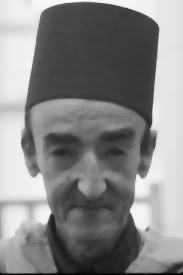

In [ ]:
gray_blured_image = cv2.medianBlur(gray_image, 5)
cv2_imshow(gray_blured_image)

Edge detection using laplacian filter

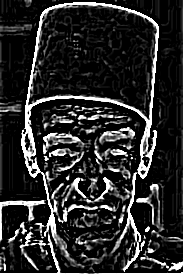

In [ ]:
edges_image = cv2.Laplacian(gray_blured_image, 0, ksize=5)
cv2_imshow(edges_image)

Binary thresholding

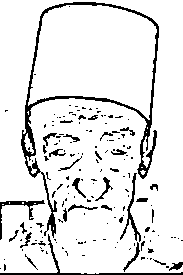

In [ ]:
_, edges_image = cv2.threshold(edges_image, 200, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(edges_image)

### 2. Generating a color painting and a cartoon

Image smoothing using bilateral filter

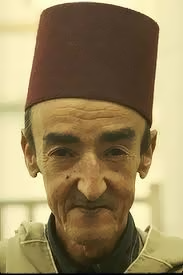

In [ ]:
smoothed_colored_image = colored_image.copy()

for _ in range(6):
  smoothed_img = cv2.bilateralFilter(smoothed_colored_image, 9, 15, 15)

cv2_imshow(smoothed_img)

### 3. Overlaying the edge mask ”sketch” onto the bilateral filter ”painting”

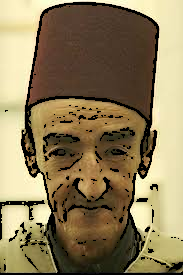

In [ ]:
cartoonified_image = np.zeros_like(colored_image)

for i in range(cartoonified_image.shape[0]):
  for j in range(cartoonified_image.shape[1]):
    if edges_image[i, j] == 0:
      cartoonified_image[i, j] = 0
    else:
      cartoonified_image[i, j] = smoothed_colored_image[i, j]

cv2_imshow(cartoonified_image)

Alternative method using bitwise and to create the final result

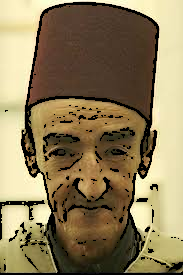

In [ ]:
cartoonified_image = np.tile(edges_image[:, :, np.newaxis], (1, 1, 3)) & smoothed_colored_image
cv2_imshow(cartoonified_image)